Humans take no effort to distinguish a dog, cat, or flying saucer. But this process is quite difficult for a computer to emulate: it only looks easy because **Allah** designs our brains incredibly well to recognize images. One common example of image recognition with machine learning is optical character recognition. 

In this file, we will build an Image Recognition model.

### What is PyTorch?

Before diving into this task let’s first understand what is PyTorch. 
* PyTorch is a library for Python programs that make it easy to create deep learning models. Like Python does for programming, PyTorch provides a great introduction to deep learning. At the same time, PyTorch has proven to be fully qualified to use in professional contexts for high-level real-world work.

### Image Recognition with Machine Learning

For the image recognition task, in this article, we will be using the **TorchVision package** which contains some of the best performing neural network architectures for computer vision, such as **AlexNet**. It also provides easy access to datasets like **ImageNet** and other utilities to learn about computer vision applications in PyTorch.

The predefined models can be found in `torchvision.models`:

In [27]:
from torchvision import models
print(dir(models))

['AlexNet', 'DenseNet', 'GoogLeNet', 'GoogLeNetOutputs', 'Inception3', 'InceptionOutputs', 'MNASNet', 'MobileNetV2', 'MobileNetV3', 'ResNet', 'ShuffleNetV2', 'SqueezeNet', 'VGG', '_GoogLeNetOutputs', '_InceptionOutputs', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_utils', 'alexnet', 'densenet', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'detection', 'googlenet', 'inception', 'inception_v3', 'mnasnet', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 'mobilenet', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'mobilenetv2', 'mobilenetv3', 'quantization', 'resnet', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50', 'resnext101_32x8d', 'resnext50_32x4d', 'segmentation', 'shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'shufflenet_v2_x1_5', 'shufflenet_v2_x2_0', 'shufflenetv2', 'squeezenet', 'squeezenet1_0', 'squeezenet1_1', 'utils', 'vgg', 'vgg11', 'vgg11_bn', 'vgg13', '

* The **uppercase names refer to Python classes** that implement several popular models. 
* **Lowercase names are handy functions** that return patterns instantiated from these classes, sometimes with different sets of parameters.

### AlexNet

To run the **AlexNet architecture** on an input image, we can create an instance of the **AlexNet** class. Here’s how to do it:

In [28]:
alexnet = models.AlexNet()

At this stage, **alexnet is an object that runs the AlexNet architecture**. It is not essential for us to understand the details of this architecture at this time. At the moment, **AlexNet is just an opaque object that can be called as a function**.

By providing alexnet with precisely sized input data, we will perform a direct transfer across the network. In other words, the input will go through the first set of neurons, the outputs of which will be transmitted to the next set of neurons, until the final output.

### ResNet

By using the **resnet101 method, we can now instantiate a 101-layer convolutional neural network**. Now let’s create an instance of the network. We’re going to pass an argument that will ask the function to download the **resnet101 weights formed on the ImageNet dataset, with 1.2 million images and 1000 categories**:

In [29]:
resnet = models.resnet101(pretrained=True)
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Now, the resnet variable can be called as a function. Before we can do that, however, we need to preprocess the input images so that they are the correct size and their values (colours) are roughly in the same numeric range. To do this, we need to use the torchvision module which provides transformations, which will allow us to quickly define pipelines of basic preprocessing functions:

In [30]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], # for 3 channel RGB image
            std=[0.229, 0.224, 0.225]
        )])

# preprocess = transforms.Compose([
#         transforms.Resize(256),
#         transforms.CenterCrop(224),
#         transforms.ToTensor(),
#         transforms.Normalize(
#             mean=0.5, # for grey image
#             std=0.5
#         )])

In [31]:
preprocess

Compose(
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In this case, we have defined a preprocessing function that will 
* scale the input image to `256 × 256`, 
* crop the image to `224 × 224` around the centre, 
* turn it into a tensor, and 
* normalize its RGB (red, green, blue) components so that they have defined means and standard deviations.

### Image Recognition

Now we can use an image for the image recognition task using our model. We took a picture of a **dog**. We can start by loading an image from the local filesystem using **Pillow, an image manipulation module for Python**:

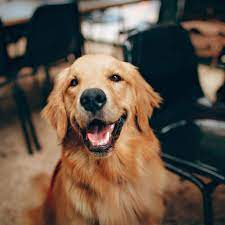

In [40]:
# from google.colab import files
# uploaded = files.upload()

from PIL import Image
img = Image.open("image recoginition/dog.jpg")
img

Next, we need to pass the image through our preprocessing pipeline for image recognition: 

In [41]:
img_t = preprocess(img)

In [42]:
img_t.shape

torch.Size([3, 224, 224])

Now we can reshape, crop, and normalize the input tensor in the way the network expects:

In [43]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()
out = resnet(batch_t)
out

tensor([[-6.9827e-01, -1.2307e+00, -9.0944e-01, -1.1637e+00, -3.1346e+00,
          8.1827e-02, -3.0233e+00, -2.2448e+00, -9.9366e-01, -3.2537e+00,
          1.7681e+00, -1.6445e+00, -8.8128e-01, -2.4304e+00, -1.2518e+00,
         -1.2669e+00, -2.4039e+00, -1.1075e+00, -1.9202e+00, -1.5229e+00,
         -2.0296e+00, -7.1001e-01, -1.6376e+00, -6.0479e-02, -1.6458e+00,
         -6.0861e-01, -3.1141e-01, -1.1040e+00, -1.5839e-01, -1.3698e+00,
         -2.8603e+00, -3.5925e+00, -7.0778e-01, -1.1943e+00, -2.0907e-01,
         -2.3384e+00, -1.7240e+00, -3.5381e+00,  6.6805e-01, -8.6587e-01,
         -1.9363e+00,  1.6032e+00,  4.2940e-01,  5.3543e-01, -1.2500e+00,
         -4.5825e-01, -7.9489e-01, -5.7272e-01, -2.3567e+00, -1.3082e+00,
         -2.9856e+00, -1.5001e+00,  8.5539e-01,  2.8265e-01, -1.2569e+00,
         -2.3410e+00, -1.6532e+00, -1.0039e+00, -2.3462e+00,  5.1114e-01,
          8.7766e-01, -1.8042e+00,  1.6121e+00,  1.0058e+00,  8.5443e-03,
          7.7826e-02,  5.1762e-01, -8.

### Run The Image Recognition Model

The process of running a trained model on new data is called **inference in deep learning circles**. In order to make inferences for this image recognition model, we need to put the network into evaluation mode. Now let’s load the [file](https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt) containing the **1,000 labels for the ImageNet dataset classes**: 

In [44]:
with open('image recoginition/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

_, index = torch.max(out, 1)

In [45]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 96.10062408447266)

This gives us something that roughly resembles the confidence the model has in its prediction. In this case, the **model is 96% certain that he knows what he is looking at is a golden retriever**.